# Complex exponentials

In [1]:
using Plots,LaTeXStrings,Printf
default(linewidth=2,label="")

For second-order equations we need to make sense of $e^{\lambda t}$ when $\lambda$ is complex. The key is one of the most famous equations in mathematics.

````{proof:formula} Euler's identity
```{math}
:label: secondlin-euler
e^{it} = \cos(t) + i \sin(t)
```
````

```{note}
Euler is a German name, and as such, it rhymes with "boiler," not "Bueller."
```

::::{dropdown} Explanation (optional, but easy)
Consider the first-order IVP $w'=i w$, $w(0)=1$, where $i^2=-1$. Assume that the solution $w(t)=e^{it}$ takes on complex values at all times. We can write it in real and imaginary parts as $w(t) = u(t) + iv(t)$. Then the ODE becomes 

$$
(u+iv)'=i u - v,
$$

which, on taking real and imaginary parts, is a coupled *real* system:

$$
u' = -v, \quad v' = u,
$$

along with $u(0)=1$ and $v(0)=0$. It should not take you long to confirm that $u(t)=\cos(t)$, $v(t)=\sin(t)$ is the result.
::::

Euler's identity shows that imaginary exponents produce oscillation, rather than the growth/decay of real exponents.

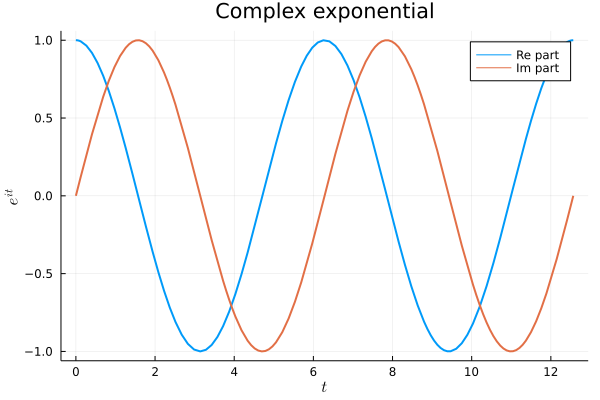

In [2]:
c = t -> real(exp(1im*t));
s = t -> imag(exp(1im*t));
plot([c s],0,4pi,label=["Re part" "Im part"],xlabel=L"t",ylabel=L"e^{it}")
title!("Complex exponential")

Alternatively, if we take $x$ and $y$ to be the real and imaginary parts of $z=e^{it}$, then they parametrically describe a unit circle in the complex plane.

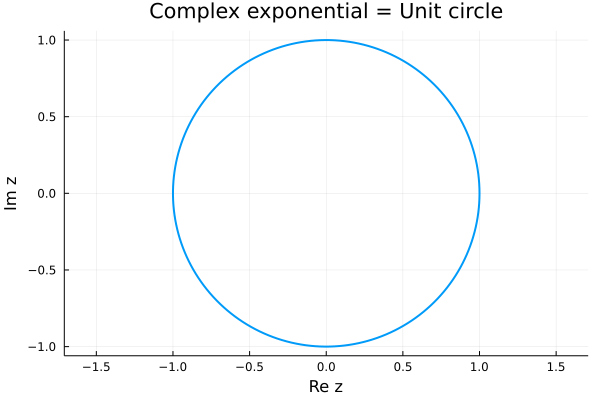

In [3]:
plot(c,s,0,2pi,aspect_ratio=1,xaxis=("Re z"),yaxis=("Im z"))
title!("Complex exponential = Unit circle")

## Polar form

Suppose $z$ is any nonzero complex value. We can write it in the form

$$
z = |z|\cdot \frac{z}{|z|},
$$

where $|z|$ is the modulus (distance from origin in the plane). Since $\frac{z}{|z|}$ has modulus equal to 1, it must lie on the unit circle. Hence there is a real $\theta$ such that

```{math}
:label: secondlin-polar
z = |z|\, e^{i\theta}.
```

We call {eq}`secondlin-polar` the **polar form** of a complex number, because it expresses $z$ as a distance from zero and an angle from the positive Re axis. Just as with any point in the plane, we can express a complex number either in Cartesian form using Re and Im parts, or in polar form using modulus and Euler's identity.

::::{proof:example}
Suppose $r$ is a positive real number. Then $-r$ lies at a distance $r$ from the origin along the negative real axis. Hence

$$
-r = |r|\, e^{i\pi}.
$$

Supposing that we may take the log of both sides, we get

$$
\ln(-r) = \ln |r| + i\pi.
$$

Using complex numbers, then, we can take the log of a negative number. You will find that this is the case in MATLAB.
::::

::::{proof:example}
What's the square root of $i$?

:::{dropdown} Solution
Since $i$ lies at a distance 1 from the origin along the positive imaginary axis, its polar form is $e^{i\pi/2}$. Then the square root is

$$
\bigl( e^{i\pi/2} \bigr)^{1/2} = e^{i\pi/4}.
$$

Appealing to Euler's formula, this is equivalent to $\frac{1}{\sqrt{2}}(1+i)$. We should note that of course, the negative of this value is also a square root.
:::
::::
## Complex exponents

Exponential functions still obey the properties you already know, even when the exponents are imaginary or complex numbers. This allows us to handle the exponential of any complex number. Writing $a+i \omega$ for real $a$ and $\omega$, we have the function

````{proof:formula} Complex exponential function
```{math}
:label: secondlin-complex-exp
e^{(a+i \omega)t} = e^{at} \cdot e^{i\omega t} = e^{at} \bigl[ \cos(\omega t) + i \sin(\omega t)\bigr].
```
````

Thus in the function $e^{\lambda t}$, the real part of $\lambda$ controls growth or decay in time, as we are familiar with, and the imaginary part of $\lambda$ controls a frequency of oscillation around a circle in the complex plane.

### Growing

If $\text{Re} \lambda > 0$, the magnitude of the function grows exponentially. The result is an outward spiral. The imaginary part of $\lambda$ controls the frequency or pitch of the spiral. The real and imaginary parts of $e^{\lambda t}$ oscillate between two growing real exponentials.

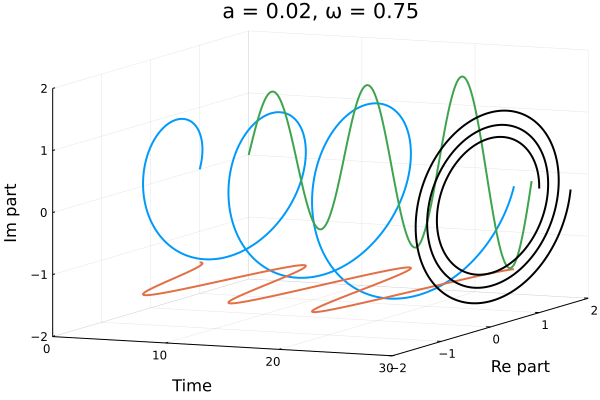

In [4]:
a = 0.02;  ω = 0.75;
t = range(0, 25, length=500)
f = @. exp((a+1im*ω)*t)

plot(t,real(f),imag(f),xlims=(0,30),ylims=(-2,2),zlims=(-2,2))
plot!(t,real(f),0*t.-1.5)
plot!(t,0*t.+2,imag(f))
plot!(0*t.+30,real(f),imag(f),l=:black,xlabel="Time",ylabel="Re part",zlabel="Im part")
title!(@sprintf("a = %.2f, ω = %.2f",a,ω))

### Neutral

When $\lambda$ is purely imaginary, the function values stay on the unit circle in the complex plane. Taking the real and imaginary parts of $e^{\lambda t}$ gives cosine and sine, respectively.

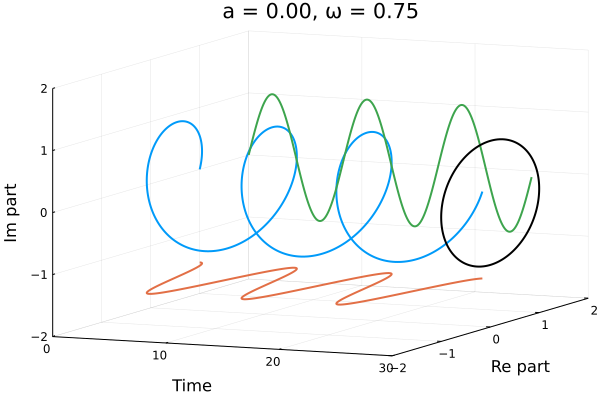

In [5]:
a = 0;  om = 1;
f = @. exp((a+1im*ω)*t)

plot(t,real(f),imag(f),xlims=(0,30),ylims=(-2,2),zlims=(-2,2))
plot!(t,real(f),0*t.-1.5)
plot!(t,0*t.+2,imag(f))
plot!(0*t.+30,real(f),imag(f),l=:black,xlabel="Time",ylabel="Re part",zlabel="Im part")
title!(@sprintf("a = %.2f, ω = %.2f",a,ω))

### Decaying

Finally, if $\text{Re} \lambda < 0$, the spiral is a decaying one. The real and imaginary parts are attenuated oscillations.

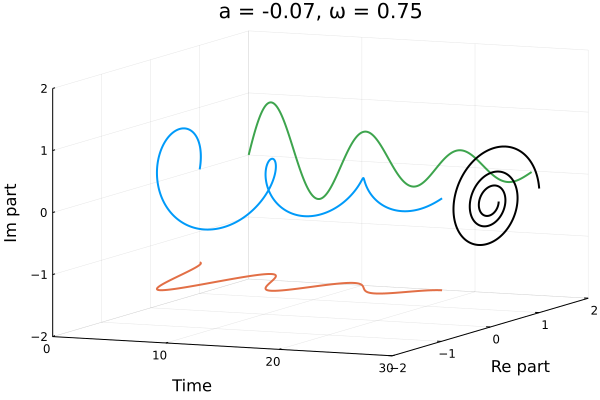

In [6]:
a = -0.07;  om = 2.4;
f = @. exp((a+1im*ω)*t)

plot(t,real(f),imag(f),xlims=(0,30),ylims=(-2,2),zlims=(-2,2))
plot!(t,real(f),0*t.-1.5)
plot!(t,0*t.+2,imag(f))
plot!(0*t.+30,real(f),imag(f),l=:black)
title!(@sprintf("a = %.2f, ω = %.2f",a,ω),xlabel="Time",ylabel="Re part",zlabel="Im part")

## Homogeneous solutions

Now we can finish the story of computing solutions to homogeneous ODEs.

::::{proof:example}
Solve the IVP $x''+9x=0$, $x(0)=2$, $x'(0)=-12$.

:::{dropdown} Solution

The characteristic polynomial is $s^2+9$, giving the roots $\pm 3i$. Hence the general solution is $x_h(t) = c_1e^{3it} + c_2e^{-3it}$.

The initial conditions require

\begin{align*}
2 &= x(0) = c_1e^0 + c_2e^0 = c_1 +c_2,\\ 
-12 &= x'(0) = 3i c_1e^0 - 3i c_2e^0 = 3i c_1 - 3i c_2.
\end{align*}

This system is easy to solve for $c_1$ and $c_2$, for example by {ref}`Cramer's Rule`, to get $c_1=1+2i$, $c_2=1-2i$.
:::
::::

There are some helpful nuances to point out about the preceding example.

````{proof:observation}
If a real second-order IVP has complex conjugate characteristic values, then the integration constants satisfy $c_2=\overline{c_1}$.
````

This can simplify the algebra a bit. If we set $c_1=\alpha + i\beta$, then

```{math}
:label: secondlin-add-subtract
c_1 + c_2 = 2\alpha, \quad c_1-c_2 = 2i\beta.
```

In the example above, this would have led us right to $2\alpha=2$ and $3i(2i\beta)=-12$, which are trivial.

It might seem odd to use complex numbers to represent what we know must be a real-valued solution. There's nothing wrong with doing so, but we can also convert it to an explicitly real form. The following is easily proved using Euler's identity.

````{proof:observation}
The general homogeneous solution

$$
x_h(t) = c_1 e^{\lambda_1 t} + c_2 e^{\lambda_2 t},
$$

where $\lambda_{1,2} = a \pm i\omega$ are complex, is equivalent to the real expression

$$
x_h(t) = e^{at} \bigl[ b_1 \cos(\omega t) + b_2 \sin(\omega t) \bigr],
$$

where $b_1,b_2$ are real constants.
````

::::{admonition} Example (continued)
:class: tip
In the preceding example, the roots were $0 \pm 3i$. Thus another expression for the general solution is

$$
x_h(t) = c_1\cos(3t) + c_2\sin(3t).
$$

The initial conditions now yield

\begin{align*}
2 &= x(0) = c_1\cos(0) + c_2\sin(0) = c_1,\\
-12 &= x'(0) = -3 c_1 \sin(0) + 3 c_2 \cos(0) = 3c_2.
\end{align*}

Hence the IVP solution is $2\cos(3t) - 4\sin(3t).$
::::

Since complex exponentials are much less familiar to you than sin and cos, the real form might seem more appealing to you. Don't be so quick to jump back there. Not only is the complex form the point of view that unifies all the second-order linear problems we solve under the exponential umbrella, but in some cases it greatly simplifies expressions and algebra.